In [2]:
import pandas as pd
import numpy as np
import load_data

df = load_data.historical_from_csv()
print(df)

                        timestamp   trade_id     price    amount  \
0         2023-03-01 00:00:00.295  429089835   1605.59  0.051726   
1         2023-03-01 00:00:00.295  429089836   1605.60  1.245640   
2         2023-03-01 00:00:00.295  429089837   1605.62  0.080871   
3         2023-03-01 00:00:00.295  429089838   1605.62  0.000953   
4         2023-03-01 00:00:00.855  429089839   1605.58  0.031282   
...                           ...        ...       ...       ...   
24250931  2023-04-01 23:59:57.530  517093848  28471.20  0.004681   
24250932  2023-04-01 23:59:58.316  517093849  28470.91  0.000141   
24250933  2023-04-01 23:59:58.369  517093850  28469.60  0.001419   
24250934  2023-04-01 23:59:58.899  517093851  28470.89  0.000365   
24250935  2023-04-01 23:59:59.344  517093852  28471.46  0.003344   

          taker_side_sell currency_pair  
0                       0       eth-usd  
1                       0       eth-usd  
2                       0       eth-usd  
3              

In [3]:
# check the anamolies for the data 
duplicateCase = df[df.duplicated(['timestamp', 'trade_id', 'amount'], keep=False)]
duplicateCase

,timestamp,trade_id,price,amount,taker_side_sell,currency_pair
51005,2023-03-01 03:56:22.993,429140840,1635.84,0.444417,1,eth-usd
51006,2023-03-01 03:56:22.993,429140840,1635.84,0.444417,1,eth-usd
51010,2023-03-01 03:56:24.910,429140844,1635.85,0.135290,0,eth-usd
51011,2023-03-01 03:56:24.910,429140844,1635.85,0.135290,0,eth-usd
51012,2023-03-01 03:56:24.910,429140844,1635.85,0.135290,0,eth-usd
...,...,...,...,...,...,...
23924457,2023-03-31 20:11:26.484,516761557,28413.52,0.010000,1,btc-usd
24083761,2023-04-01 09:37:13.215,516924136,28479.35,0.005000,1,btc-usd
24083762,2023-04-01 09:37:13.215,516924136,28479.35,0.005000,1,btc-usd
24183761,2023-04-01 18:44:09.751,517025626,28363.22,0.000141,1,btc-usd


In [4]:
# we drop the columns that has excatly same timestamp, trade_id, and amount
duplicateCase.shape[0]
df.drop_duplicates(subset=["timestamp", "trade_id", "amount"], keep="last", inplace=True)

In [5]:
df

,timestamp,trade_id,price,amount,taker_side_sell,currency_pair
0,2023-03-01 00:00:00.295,429089835,1605.59,0.051726,0,eth-usd
1,2023-03-01 00:00:00.295,429089836,1605.60,1.245640,0,eth-usd
2,2023-03-01 00:00:00.295,429089837,1605.62,0.080871,0,eth-usd
3,2023-03-01 00:00:00.295,429089838,1605.62,0.000953,0,eth-usd
4,2023-03-01 00:00:00.855,429089839,1605.58,0.031282,1,eth-usd
...,...,...,...,...,...,...
24250931,2023-04-01 23:59:57.530,517093848,28471.20,0.004681,1,btc-usd
24250932,2023-04-01 23:59:58.316,517093849,28470.91,0.000141,1,btc-usd
24250933,2023-04-01 23:59:58.369,517093850,28469.60,0.001419,0,btc-usd
24250934,2023-04-01 23:59:58.899,517093851,28470.89,0.000365,1,btc-usd


In [6]:
df.isnull().sum()

timestamp          0
trade_id           0
price              0
amount             0
taker_side_sell    0
currency_pair      0
dtype: int64

The above result showed that now our data frame is working without any anomalies. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24242461 entries, 0 to 24250935
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        object 
 1   trade_id         int64  
 2   price            float64
 3   amount           float64
 4   taker_side_sell  int64  
 5   currency_pair    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ GB


In [8]:
df.describe()

,trade_id,price,amount,taker_side_sell
count,2.424246e+07,2.424246e+07,2.424246e+07,2.424246e+07
mean,4.763925e+08,1.478313e+04,2.735681e-01,4.937717e-01
std,3.789908e+07,1.198922e+04,1.323431e+00,4.999612e-01
min,4.290898e+08,1.369790e+03,1.000000e-08,0.000000e+00
25%,4.351518e+08,1.738400e+03,3.389960e-03,0.000000e+00
50%,5.049629e+08,2.091011e+04,2.756491e-02,0.000000e+00
75%,5.110242e+08,2.709767e+04,1.352300e-01,1.000000e+00
max,5.170939e+08,2.919004e+04,1.451450e+03,1.000000e+00


In [9]:
df.describe(include="object")

,timestamp,currency_pair
count,24242461,24242461
unique,12883838,2
top,2023-03-13 20:24:06.092,btc-usd
freq,548,13377769


In [10]:
# check if there is any correlation between different colmuns 
df.corr()

/var/folders/nv/_lx3265n1ylgqznjwtpq7p200000gn/T/ipykernel_23665/1235333285.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,trade_id,price,amount,taker_side_sell
trade_id,1.000000,0.992120,-0.190951,-0.037974
price,0.992120,1.000000,-0.187813,-0.033782
amount,-0.190951,-0.187813,1.000000,0.007889
taker_side_sell,-0.037974,-0.033782,0.007889,1.000000


In [11]:
# statistical summary per currency pair
#eth-usd 
df[df["currency_pair"]=="eth-usd"].describe()


,trade_id,price,amount,taker_side_sell
count,1.086469e+07,1.086469e+07,1.086469e+07,1.086469e+07
mean,4.345236e+08,1.680068e+03,5.529925e-01,5.208781e-01
std,3.137066e+06,1.200400e+02,1.933371e+00,4.995639e-01
min,4.290898e+08,1.369790e+03,1.000000e-08,0.000000e+00
25%,4.318070e+08,1.572450e+03,1.865573e-02,0.000000e+00
50%,4.345235e+08,1.714700e+03,9.260963e-02,1.000000e+00
75%,4.372397e+08,1.780010e+03,4.989088e-01,1.000000e+00
max,4.399619e+08,1.861670e+03,1.451450e+03,1.000000e+00


In [12]:
# statistical summary per currency pair
# btc-usd
df[df["currency_pair"]=="btc-usd"].describe()


,trade_id,price,amount,taker_side_sell
count,1.337777e+07,1.337777e+07,1.337777e+07,1.337777e+07
mean,5.103962e+08,2.542472e+04,4.663501e-02,4.717574e-01
std,3.862771e+06,2.790628e+03,1.525525e-01,4.992017e-01
min,5.037058e+08,1.956852e+04,1.000000e-08,0.000000e+00
25%,5.070511e+08,2.246826e+04,1.422000e-03,0.000000e+00
50%,5.103959e+08,2.673785e+04,1.000000e-02,0.000000e+00
75%,5.137405e+08,2.791876e+04,4.383909e-02,1.000000e+00
max,5.170939e+08,2.919004e+04,5.298100e+01,1.000000e+00


In [13]:
# average price per currency pair
df.groupby("currency_pair")["price"].mean()

currency_pair
btc-usd    25424.719196
eth-usd     1680.067752
Name: price, dtype: float64

(array([10864692.,        0.,        0.,  4029180.,  9348589.]),
 array([ 1369.79,  6933.84, 12497.89, 18061.94, 23625.99, 29190.04]),
 <BarContainer object of 5 artists>)

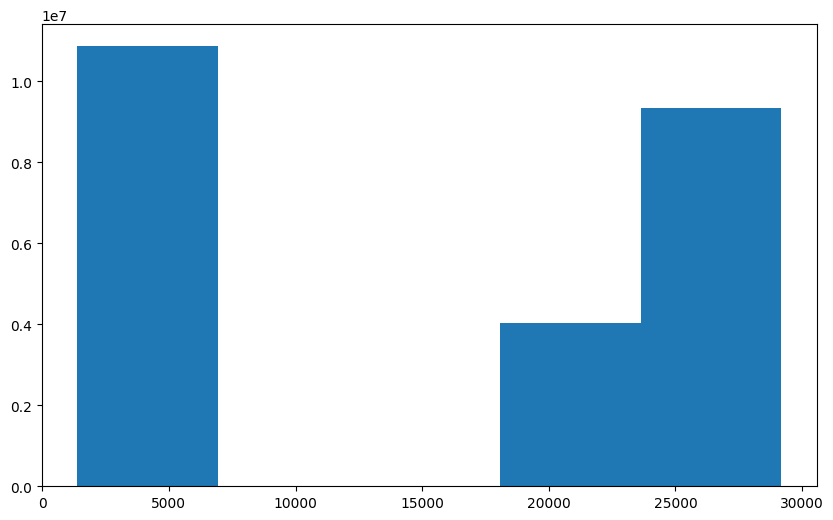

In [14]:
# plot price distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df["price"], bins=5)

In [15]:
# split data by currency pair
grouped = df.groupby('currency_pair')

# access data for specific group
price_eth = grouped.get_group('eth-usd')
price_btc = grouped.get_group('btc-usd')

In [16]:
# Using price_eth and price_btc tables
# Extract relevant price column

currency_eth_prices = price_eth['price']
currency_btc_prices = price_btc['price']


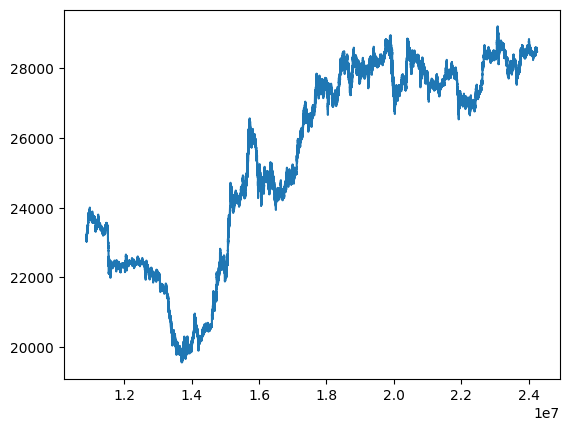

In [17]:
# plot price per currency pair

import matplotlib.pyplot as plt

plt.plot(currency_btc_prices)